# **plottign analysing the genome vs simulation noncoding triplet freqs**

In [18]:
library(ggplot2)
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [28]:
data <- read.csv("data/Data_dataframes/DataDF_2022_01_04_nonCoding_genomeVsSim.csv")

## **regression**

In [4]:
summary(lm(data$intergenic_freq~data$sim_mean_freq))


Call:
lm(formula = data$intergenic_freq ~ data$sim_mean_freq)

Residuals:
     Min       1Q   Median       3Q      Max 
-9626493 -5237438   -57295  5317123 13874489 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7196235.1  1478251.1   4.868 8.11e-06 ***
data$sim_mean_freq   11720.1      821.1  14.273  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5875000 on 62 degrees of freedom
Multiple R-squared:  0.7667,	Adjusted R-squared:  0.7629 
F-statistic: 203.7 on 1 and 62 DF,  p-value: < 2.2e-16


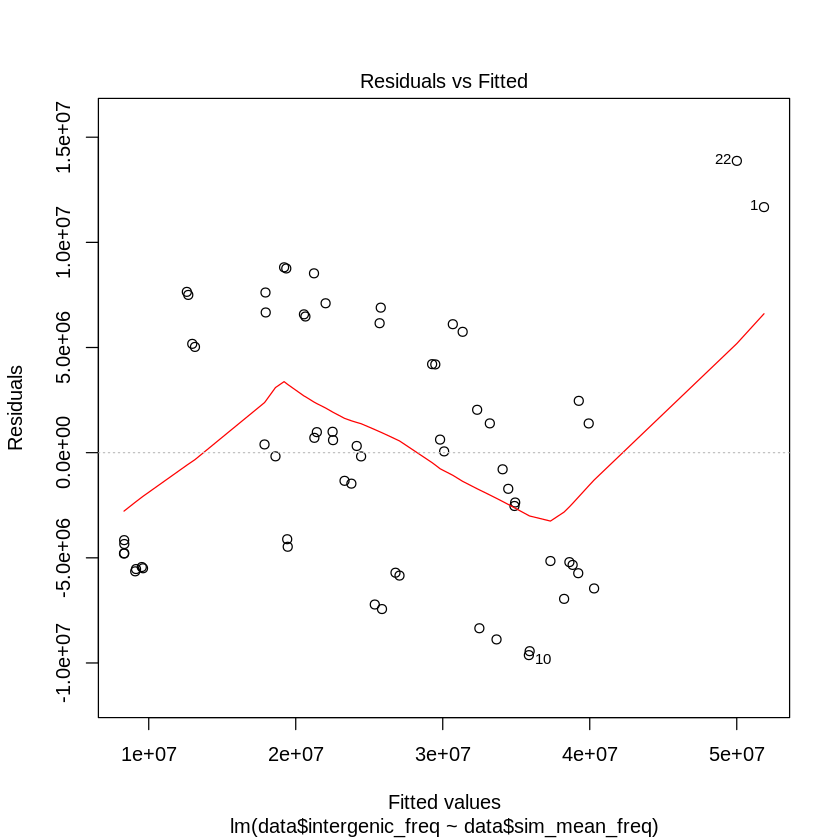

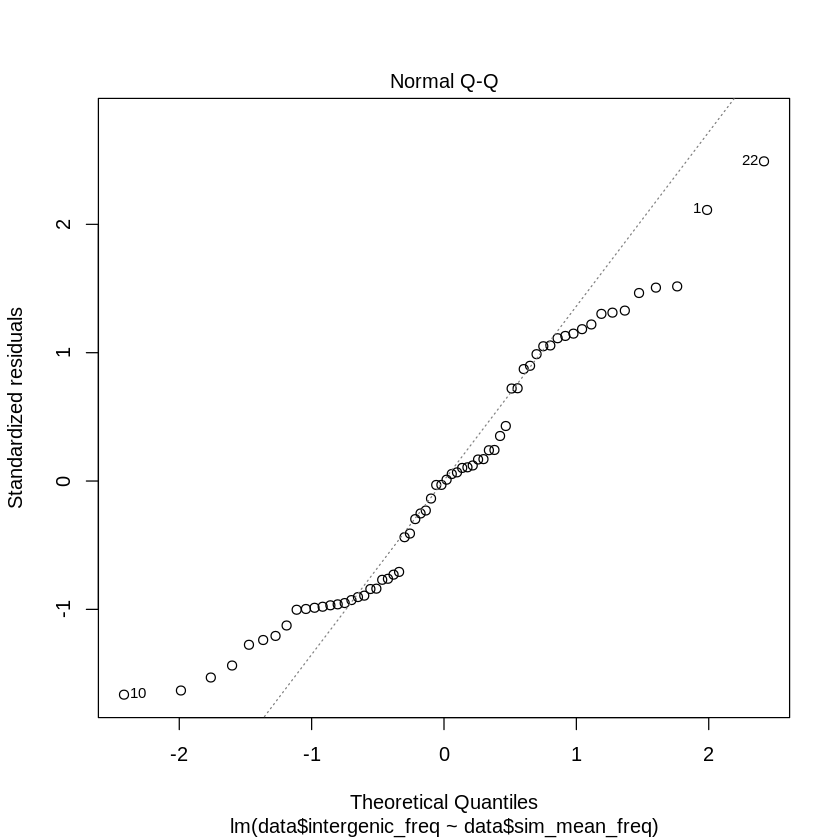

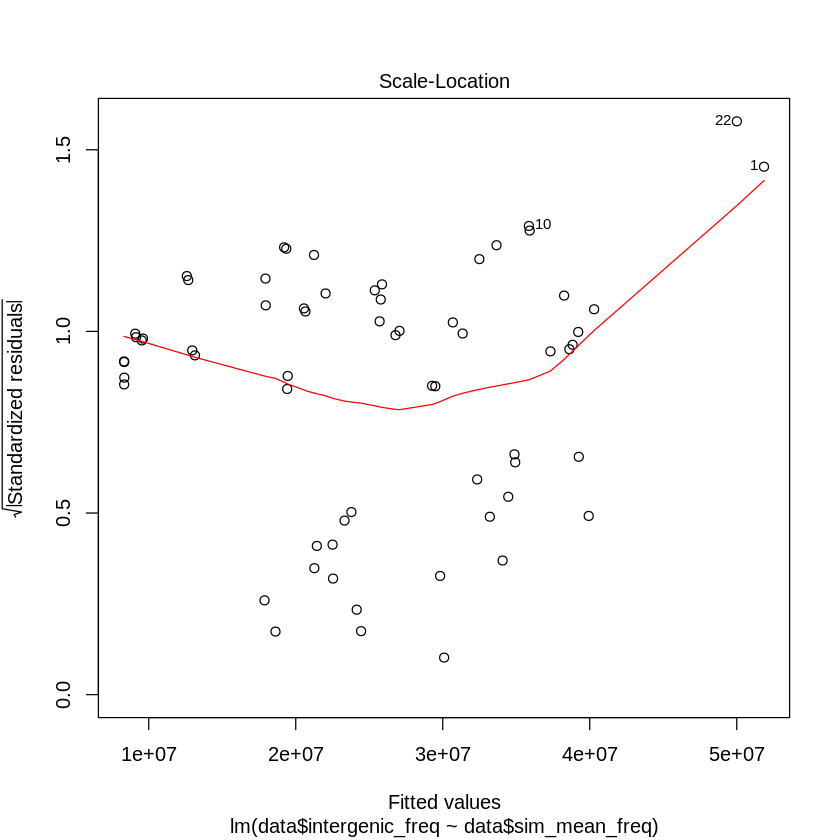

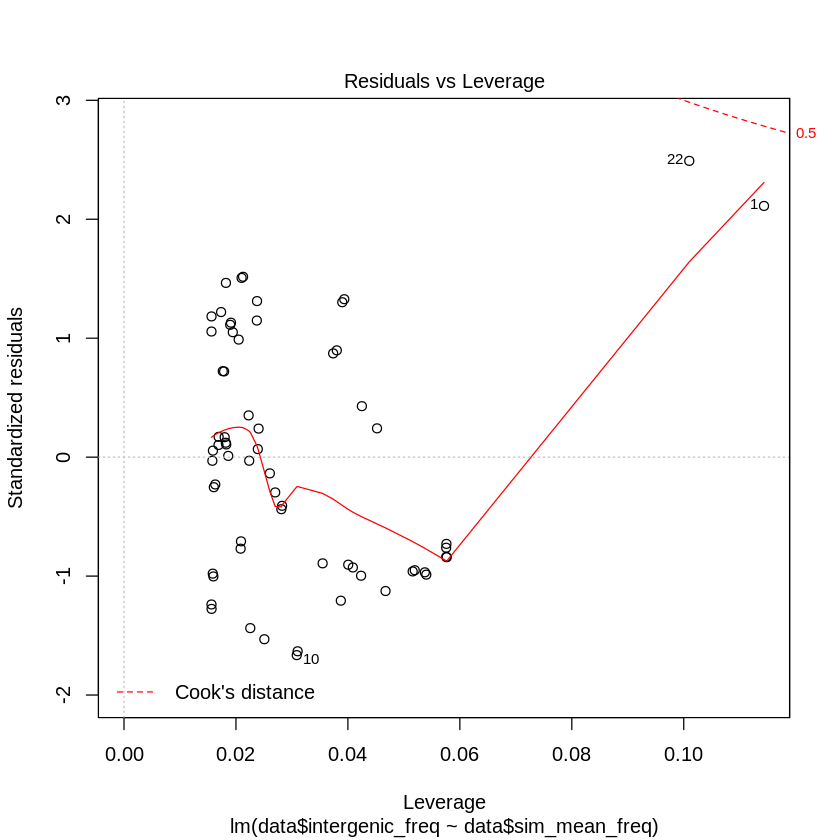

In [5]:
plot(lm(data$intergenic_freq~data$sim_mean_freq)) #checking conditions 

## **plotting**

Saving 6.67 x 6.67 in image


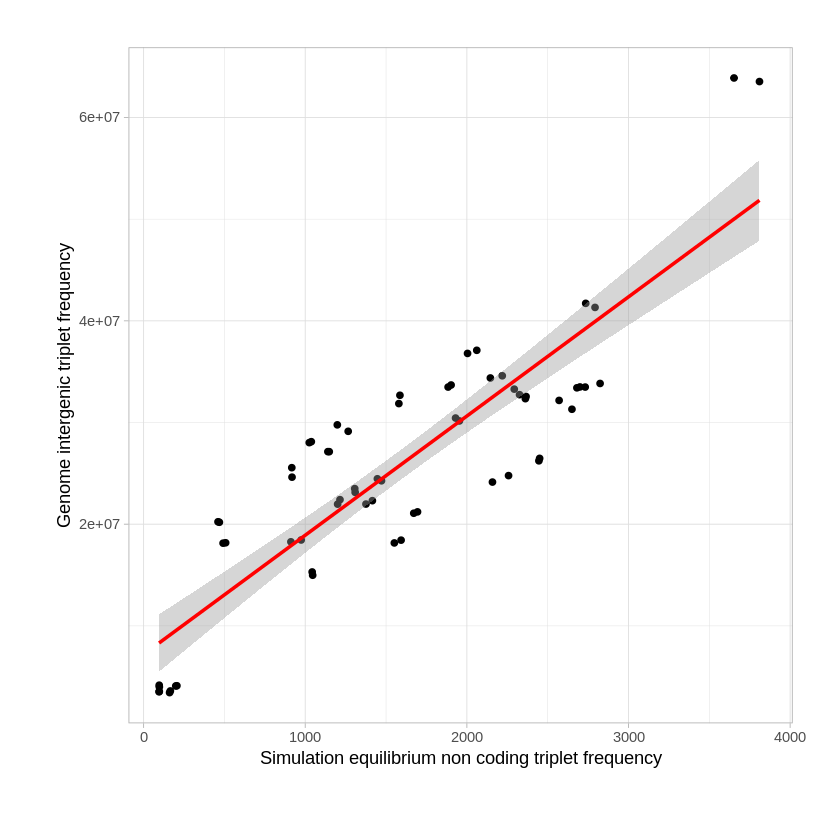

In [38]:
ggplot(data, aes(x=sim_mean_freq,y=intergenic_freq))+
    theme_light()+
    geom_point()+
    geom_errorbarh(aes(xmin=sim_mean_freq-sim_stderr_freq, xmax=sim_mean_freq+sim_stderr_freq))+#https://ggplot2.tidyverse.org/reference/geom_errorbarh.html
    labs(x="Simulation equilibrium non coding triplet frequency",y="Genome intergenic triplet frequency")+
    stat_smooth(method="lm",formula=y~x, col = "red")+
    theme(plot.margin=unit(c(1,1,1.5,1.2),"cm")) #adding extra room around the margins https://stackoverflow.com/questions/18252827/increasing-area-around-plot-area-in-ggplot2
ggsave(filename="plots/Scatter_2022_01_04_tripFreq_genomeVsSim_nonCoding.pdf")